<a href="https://colab.research.google.com/github/bhargavi0401/SudokuSolver.github.io/blob/main/Data%20Analysis%20of%20Covid-19%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Covid-19 Data Analysis

You are given a dataset containing details about new COVID-19 cases recorded in India on daily
basis as a csv file (daily_covid_cases.csv). It shows the rolling 7-day average of newly
confirmed cases starting from 30th-Jan-2020 to 2-Oct-2021. Rows are indexed with dates; the first
column represents the date and the second column represents the new COVID-19 cases recorded
that day. Analyze the dataset to build an autoregression (AR) model.



1. Autocorrelation line plot with lagged values:

a. Create a line plot with the x-axis as index of the day and y-axis as the number of Covid-19
cases, as given below. Observe the first wave (around August-2020) and second wave
(May-2021) of COVID-19 in India.

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter , MonthLocator
import statsmodels.api as sm

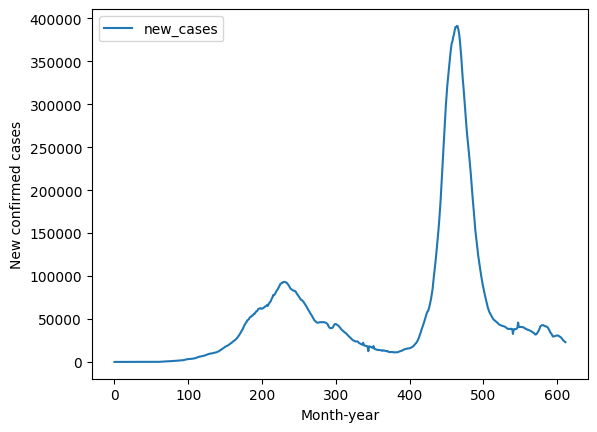

In [ ]:
# Read the dataset
data = pd.read_csv('daily_covid_cases.csv')

#line plot of date vs number of Covid-19 cases.
data.plot()
plt.xlabel('Month-year')
plt.ylabel('New confirmed cases')
plt.show()

b. Generate another time sequence with a one-day lag to the given time sequence. Find the
Pearson correlation (autocorrelation) coefficient between the generated one-day lag time
sequence and the given time sequence.

In [ ]:
# Calculate one-day lag
data['one-day lag'] = data['new_cases'].shift(1)

# Calculate means and standard deviations
e_1 = data['new_cases'].mean()
e_2 = data['one-day lag'].mean()
std_1 = data['new_cases'].std()
std_2 = data['one-day lag'].std()

# Calculate autocorrelation
s = ((data['new_cases'] - e_1) * (data['one-day lag'] - e_2)).sum()
corr = s / ((len(data) - 1) * std_1 * std_2)

print(f'AutoCorrelation between one-day lag time sequence and given time sequence is {corr}')


AutoCorrelation between one-day lag time sequence and given time sequence is 0.9978519887505969


c. Generate a scatter plot between the given time sequence and one-day lagged generated
sequence in 1.b. What do you infer regarding correlation? Does it match with the computed
correlation coefficient in 1.b?

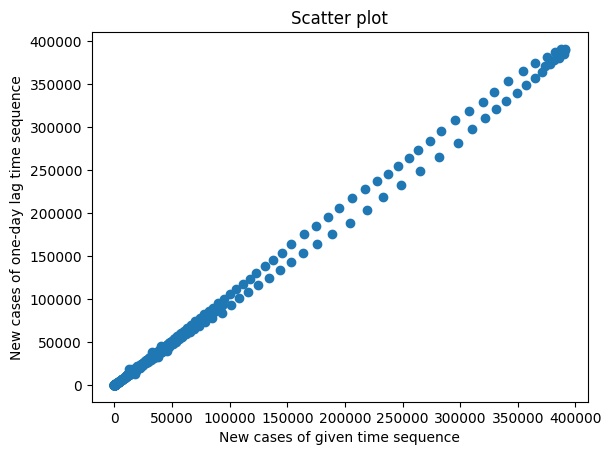

In [ ]:
# Create lagged dataset without the first row
lag_data = data.iloc[1:]

# Scatter plot
plt.scatter(lag_data['new_cases'], lag_data['one-day lag'])
plt.xlabel('New cases of given time sequence')
plt.ylabel('New cases of one-day lag time sequence')
plt.title('Scatter plot')
plt.show()


d. Generate multiple time sequences with different lag values (1-day, 2-days, 3-days up to 6-
days). Compute the Pearson correlation coefficient between each of the generated time
sequences and the given time sequence. Create a line plot between obtained correlation
coefficients (on the y-axis) and lagged values (on the x-axis).

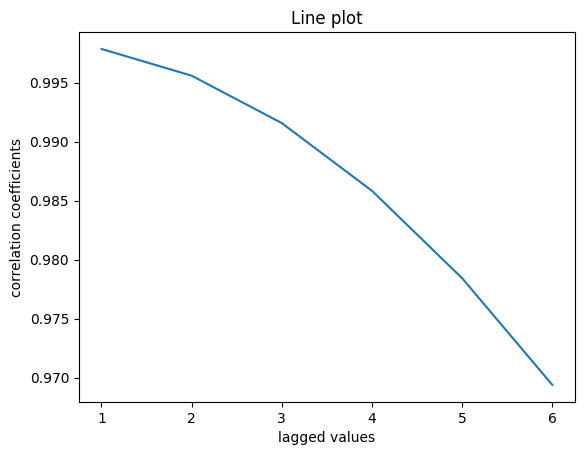

In [ ]:
# Calculate and plot autocorrelation for different lags
lag = [1, 2, 3, 4, 5, 6]

for i in lag:
    # Create lagged column
    data[f'{i}-days lag'] = data['new_cases'].shift(i)

corr_coeff = []
for i in lag:
    # Calculate means and standard deviations
    e_1 = data['new_cases'].mean()
    e_2 = data[f'{i}-days lag'].mean()
    std_1 = data['new_cases'].std()
    std_2 = data[f'{i}-days lag'].std()

    # Calculate autocorrelation
    s = ((data['new_cases'] - e_1) * (data[f'{i}-days lag'] - e_2)).sum()
    corr = s / ((len(data) - i) * std_1 * std_2)
    corr_coeff.append(corr)

# Plot autocorrelation
plt.plot(lag, corr_coeff)
plt.xlabel('lagged values')
plt.ylabel('correlation coefficients')
plt.title('Line plot')
plt.show()


e. Plot a correlogram or Auto Correlation Function using python inbuilt function
‘plot_acf’. Observe the trend in the line plot with increase in lagged values and relate
with that of 1 d.

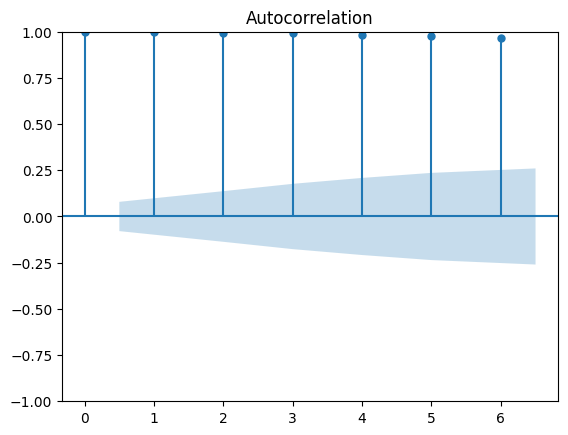

In [ ]:
#e
sm.graphics.tsa.plot_acf(data['new_cases'],lags=6)
plt.show()


# Analysis of Pima Indians Diabetes Database

You are given the Pima Indians Diabetes Database as a csv file. This data-set is originally
from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to
predict based on diagnostic measurements whether a patient has diabetes. Several constraints
were placed on the selection of these instances from a larger database. In particular, all patients
here are females with at least 21 years old of Pima Indian heritage. It contains following 9
attributes.

pregs: Number of times pregnant

plas: Plasma glucose concentration 2 hours in an oral glucose tolerance test

pres: Diastolic blood pressure (mm Hg)

skin: Triceps skin fold thickness (mm)

test: 2-Hour serum insulin (mu U/mL)

BMI: Body mass index (weight in kg/(height in m)^2)

pedi: Diabetes pedigree function

Age: Age (years)

class: Class variable (0 or 1)


1. Mean, median, mode, minimum, maximum and standard deviation for all the attributes
excluding the attribute ‘class’.

In [ ]:
import matplotlib as mp
import pandas as pd
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv('pima-indians-diabetes.csv')


# Calculate and print the mean for each column
pregs_mean = df["pregs"].mean()
print("The mean of pregs is", pregs_mean)

plas_mean = df["plas"].mean()
print("The mean of plas is", plas_mean)

pres_mean = df["pres"].mean()
print("The mean of pres is", pres_mean)

skin_mean = df["skin"].mean()
print("The mean of skin is", skin_mean)

test_mean = df["test"].mean()
print("The mean of test is", test_mean)

print("The mean of BMI is", df["BMI"].mean())
print("The mean of pedi is", df["pedi"].mean())
print("The mean of Age is", df["Age"].mean())


The mean of pregs is 3.8450520833333335
The mean of plas is 120.89453125
The mean of pres is 69.10546875
The mean of skin is 20.536458333333332
The mean of test is 79.79947916666667
The mean of BMI is 31.992578124999998
The mean of pedi is 0.47187630208333325
The mean of Age is 33.240885416666664


In [ ]:
# Calculate and print the median for each column
print("The median of pregs is", df["pregs"].median())
print("The median of plas is", df["plas"].median())
print("The median of pres is", df["pres"].median())
print("The median of skin is", df["skin"].median())
print("The median of test is", df["test"].median())
print("The median of BMI is", df["BMI"].median())
print("The median of pedi is", df["pedi"].median())
print("The median of Age is", df["Age"].median())

The median of pregs is 3.0
The median of plas is 117.0
The median of pres is 72.0
The median of skin is 23.0
The median of test is 30.5
The median of BMI is 32.0
The median of pedi is 0.3725
The median of Age is 29.0


In [ ]:
# Calculate and print the mode for each column
print("The mode of pregs is", df["pregs"].mode())
print("The mode of plas is", df["plas"].mode())
print("The mode of pres is", df["pres"].mode())
print("The mode of skin is", df["skin"].mode())
print("The mode of test is", df["test"].mode())
print("The mode of BMI is", df["BMI"].mode())
print("The mode of pedi is", df["pedi"].mode())
print("The mode of Age is", df["Age"].mode())

The mode of pregs is 0    1
Name: pregs, dtype: int64
The mode of plas is 0     99
1    100
Name: plas, dtype: int64
The mode of pres is 0    70
Name: pres, dtype: int64
The mode of skin is 0    0
Name: skin, dtype: int64
The mode of test is 0    0
Name: test, dtype: int64
The mode of BMI is 0    32.0
Name: BMI, dtype: float64
The mode of pedi is 0    0.254
1    0.258
Name: pedi, dtype: float64
The mode of Age is 0    22
Name: Age, dtype: int64


In [ ]:
# Calculate and print the minimum for each column
print("The minimum of pregs is", df["pregs"].min())
print("The minimum of plas is", df["plas"].min())
print("The minimum of pres is", df["pres"].min())
print("The minimum of skin is", df["skin"].min())
print("The minimum of test is", df["test"].min())
print("The minimum of BMI is", df["BMI"].min())
print("The minimum of pedi is", df["pedi"].min())
print("The minimum of Age is", df["Age"].min())

The minimum of pregs is 0
The minimum of plas is 0
The minimum of pres is 0
The minimum of skin is 0
The minimum of test is 0
The minimum of BMI is 0.0
The minimum of pedi is 0.078
The minimum of Age is 21


In [ ]:
# Calculate and print the maximum for each column
print("The maximum of pregs is", df["pregs"].max())
print("The maximum of plas is", df["plas"].max())
print("The maximum of pres is", df["pres"].max())
print("The maximum of skin is", df["skin"].max())
print("The maximum of test is", df["test"].max())
print("The maximum of BMI is", df["BMI"].max())
print("The maximum of pedi is", df["pedi"].max())
print("The maximum of Age is", df["Age"].max())

The maximum of pregs is 17
The maximum of plas is 199
The maximum of pres is 122
The maximum of skin is 99
The maximum of test is 846
The maximum of BMI is 67.1
The maximum of pedi is 2.42
The maximum of Age is 81


In [ ]:
# Calculate and print the standard deviation for each column
print("The standard deviation of pregs is", df["pregs"].std())
print("The standard deviation of plas is", df["plas"].std())
print("The standard deviation of pres is", df["pres"].std())
print("The standard deviation of skin is", df["skin"].std())
print("The standard deviation of test is", df["test"].std())
print("The standard deviation of BMI is", df["BMI"].std())
print("The standard deviation of pedi is", df["pedi"].std())
print("The standard deviation of Age is", df["Age"].std())

The standard deviation of pregs is 3.3695780626988694
The standard deviation of plas is 31.97261819513622
The standard deviation of pres is 19.355807170644777
The standard deviation of skin is 15.952217567727637
The standard deviation of test is 115.24400235133817
The standard deviation of BMI is 7.884160320375446
The standard deviation of pedi is 0.3313285950127749
The standard deviation of Age is 11.760231540678685


2. Obtain the scatter plot between

a. ‘Age’ and each of the other attributes, excluding ‘class’

b. ‘BMI’ and each of the other attributes, excluding ‘class’

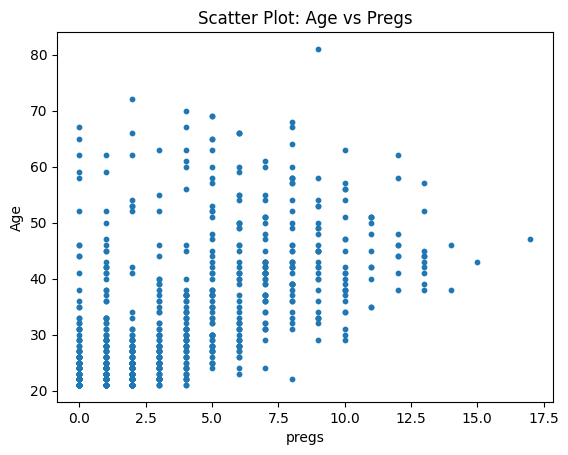

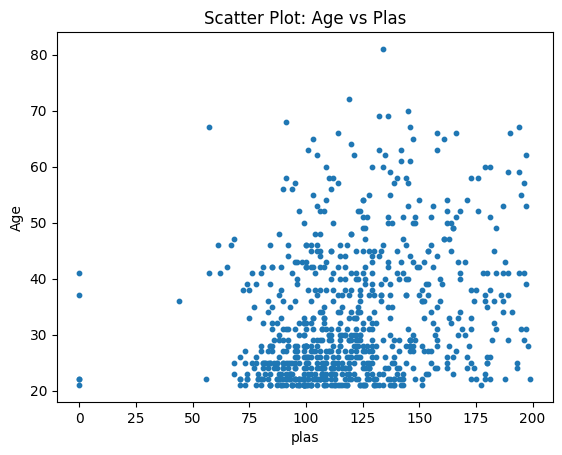

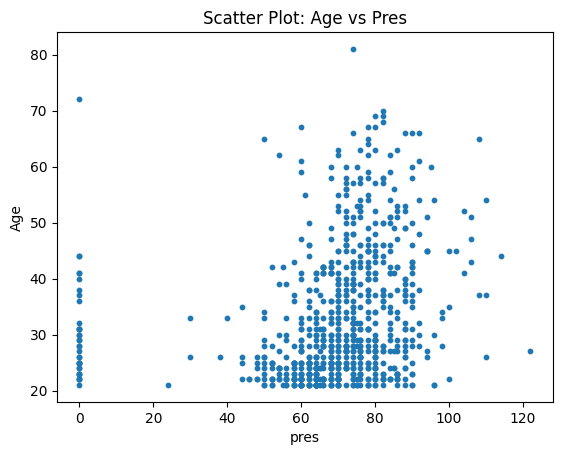

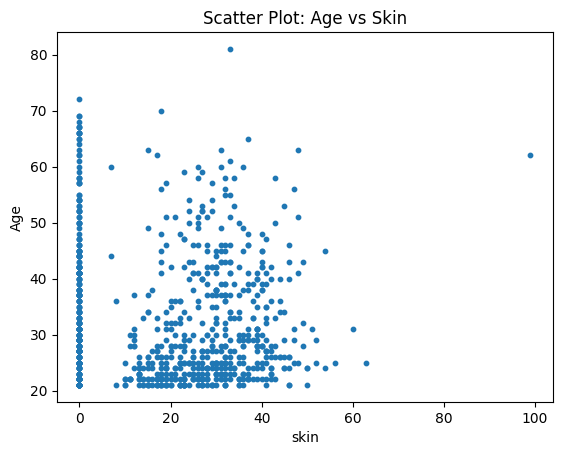

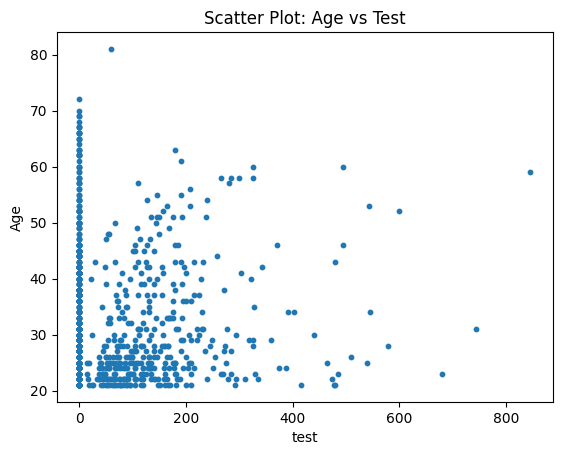

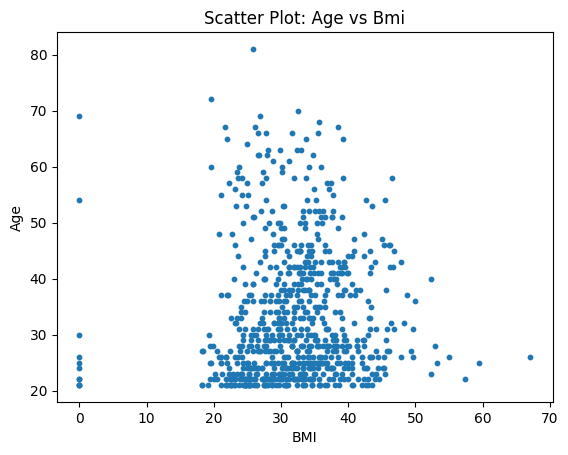

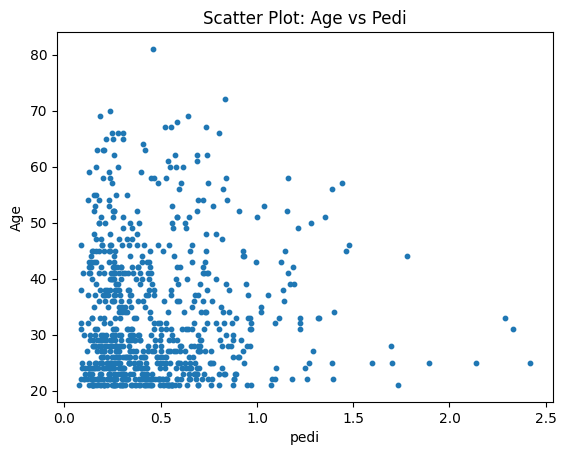

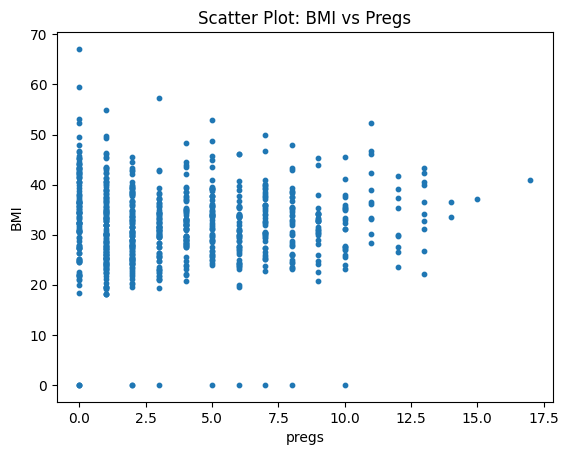

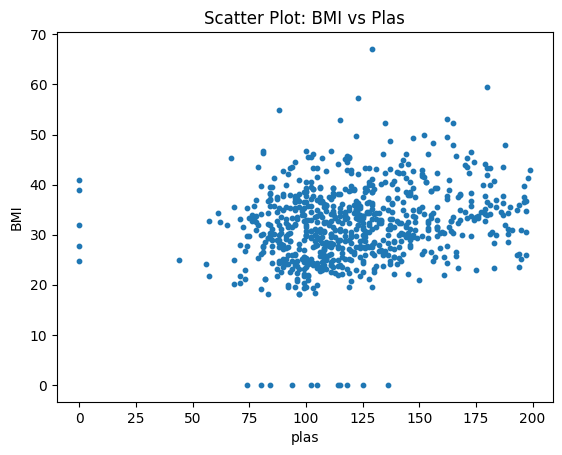

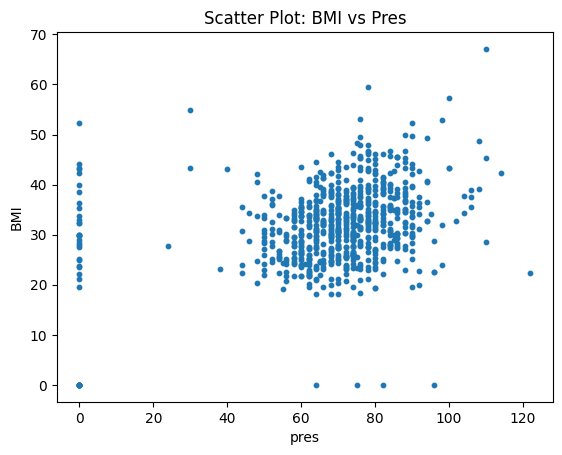

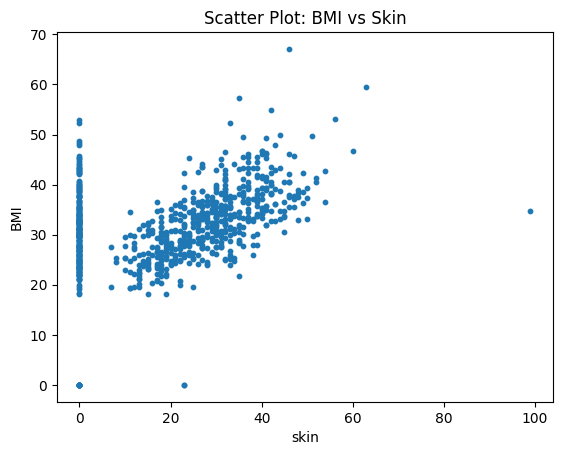

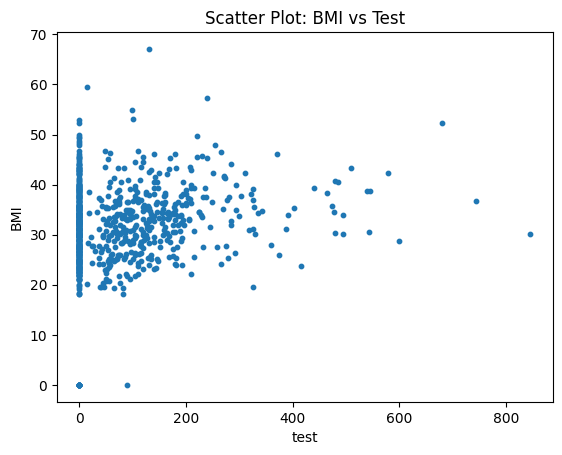

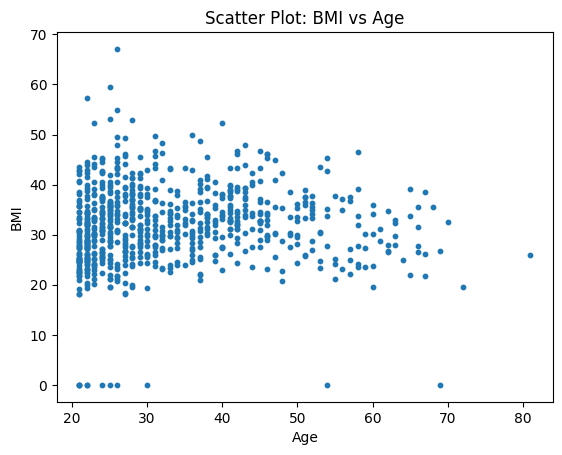

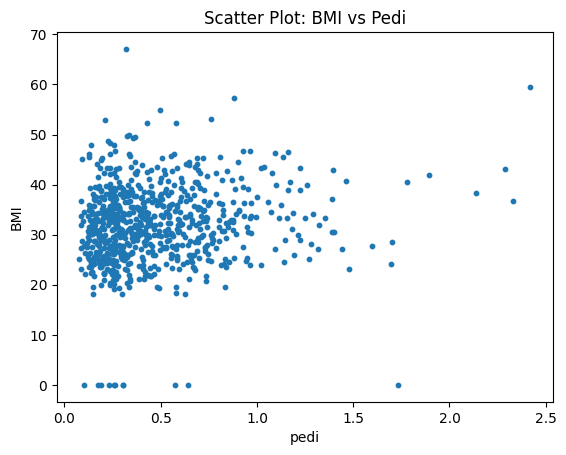

In [ ]:
import matplotlib.pyplot as plt

# Scatter plots for 'Age' and each attribute (excluding 'class')
attributes_age = ["pregs", "plas", "pres", "skin", "test", "BMI", "pedi"]
for attribute in attributes_age:
    df.plot.scatter(x=attribute, y='Age', s=10, title=f'Scatter Plot: Age vs {attribute.capitalize()}')
    plt.show()

# Scatter plots for 'BMI' and each attribute (excluding 'class')
attributes_bmi = ["pregs", "plas", "pres", "skin", "test", "Age", "pedi"]
for attribute in attributes_bmi:
    df.plot.scatter(x=attribute, y='BMI', s=10, title=f'Scatter Plot: BMI vs {attribute.capitalize()}')
    plt.show()


3. Find the value of correlation coefficient in the following cases:

a. ‘Age’ with all other attributes (excluding ‘class’).

b. ‘BMI’ with all other attributes (excluding ‘class’)

In [ ]:
# Correlation between 'Age' and each attribute
attributes_age = ["pregs", "plas", "pres", "skin", "test", "BMI", "pedi"]
for attribute in attributes_age:
    correlation_age = df['Age'].corr(df[attribute])
    print(f'Correlation between Age and {attribute} is {correlation_age}')

# Correlation between 'BMI' and each attribute
attributes_bmi = ["pregs", "plas", "pres", "skin", "test", "pedi"]
for attribute in attributes_bmi:
    correlation_bmi = df['BMI'].corr(df[attribute])
    print(f'Correlation between BMI and {attribute} is {correlation_bmi}')

Correlation between Age and pregs is 0.5443412284023393
Correlation between Age and plas is 0.2635143198243338
Correlation between Age and pres is 0.23952794642136366
Correlation between Age and skin is -0.11397026236774165
Correlation between Age and test is -0.04216295473537674
Correlation between Age and BMI is 0.03624187009229416
Correlation between Age and pedi is 0.03356131243480552
Correlation between BMI and pregs is 0.017683090727830596
Correlation between BMI and plas is 0.22107106945898294
Correlation between BMI and pres is 0.2818052888499106
Correlation between BMI and skin is 0.3925732041590384
Correlation between BMI and test is 0.19785905649310132
Correlation between BMI and pedi is 0.1406469525451051


4. Plot the histogram for the attributes ‘preg’ and ‘skin’

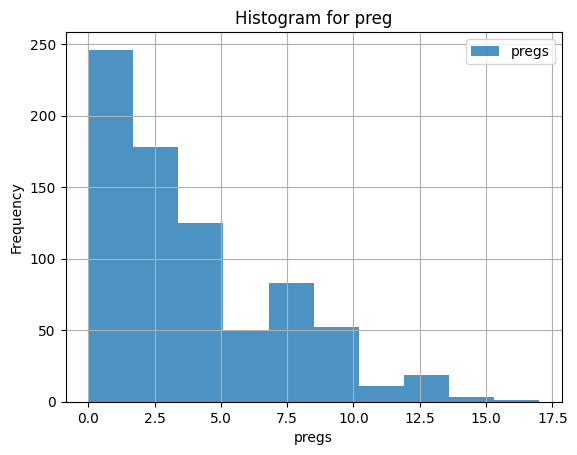

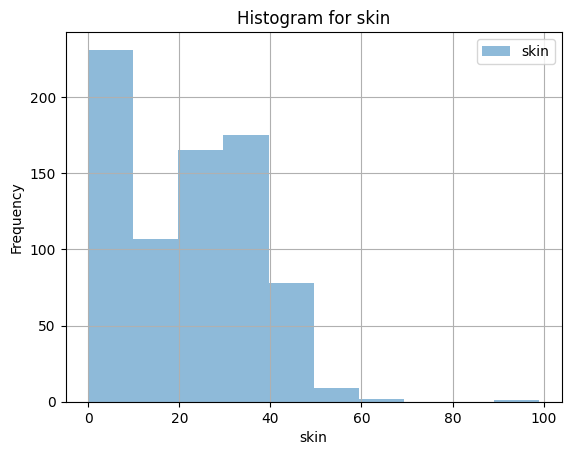

In [ ]:
# Plot histogram for 'pregs'
df['pregs'].hist(alpha=0.8, label='pregs')
plt.title('Histogram for preg')
plt.xlabel('pregs')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot histogram for 'skin'
df['skin'].hist(alpha=0.5, label='skin')
plt.title('Histogram for skin')
plt.xlabel('skin')
plt.ylabel('Frequency')
plt.legend()
plt.show()

5. Plot the histogram of attribute ‘preg’ for each of the 2 classes individually

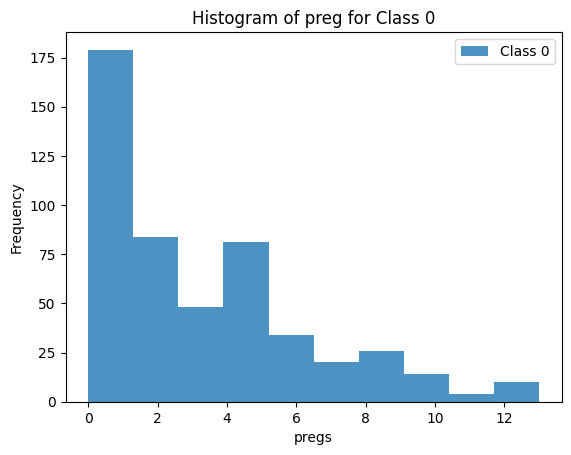

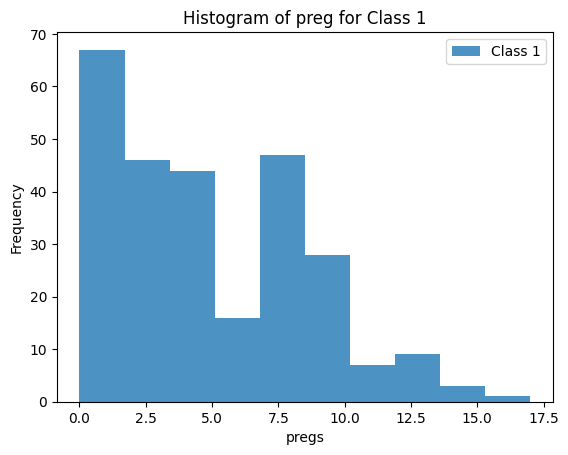

In [ ]:
# Group by 'class'
grouped_by_class = df.groupby('class')

# Separate data for each class
class_0_data = grouped_by_class.get_group(0)['pregs']
class_1_data = grouped_by_class.get_group(1)['pregs']

# Plot histogram for class 0
plt.hist(class_0_data, alpha=0.8, label='Class 0')
plt.title('Histogram of preg for Class 0')
plt.xlabel('pregs')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot histogram for class 1
plt.hist(class_1_data, alpha=0.8, label='Class 1')
plt.title('Histogram of preg for Class 1')
plt.xlabel('pregs')
plt.ylabel('Frequency')
plt.legend()
plt.show()

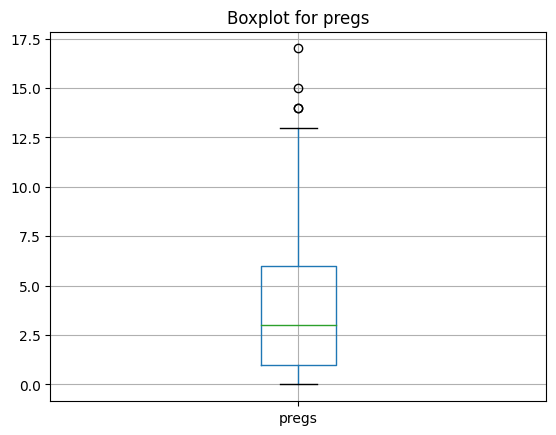

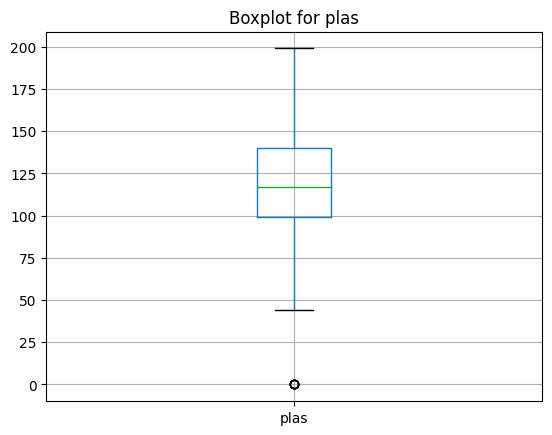

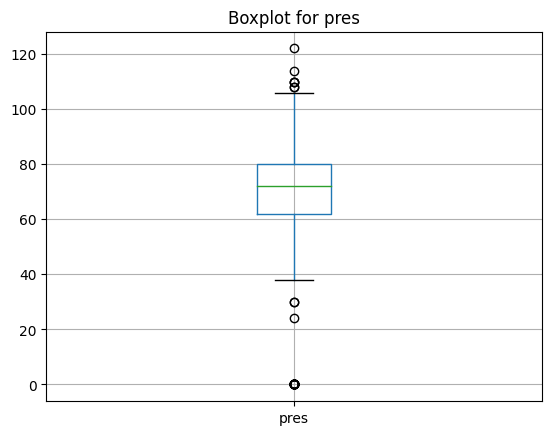

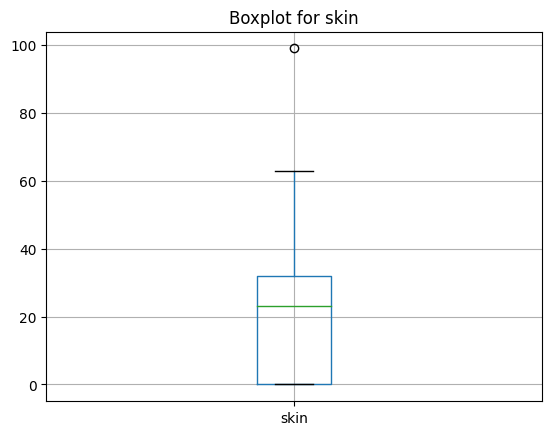

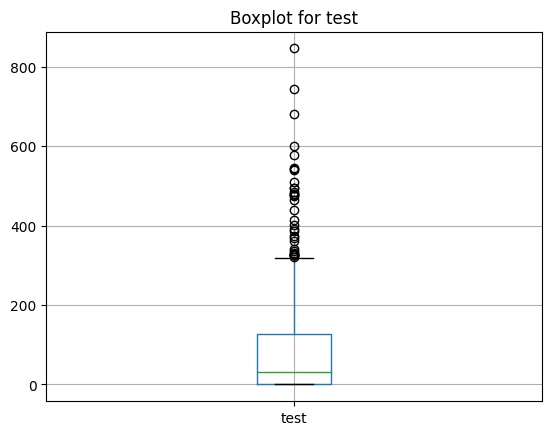

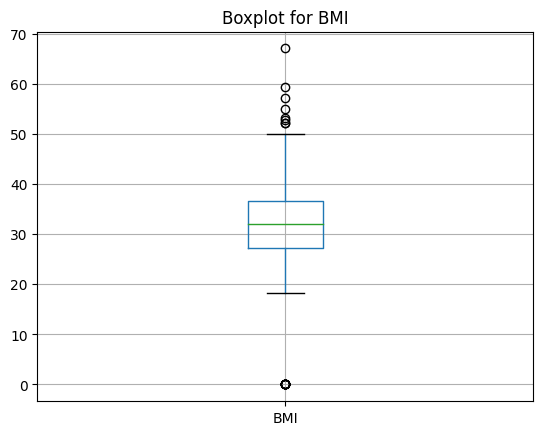

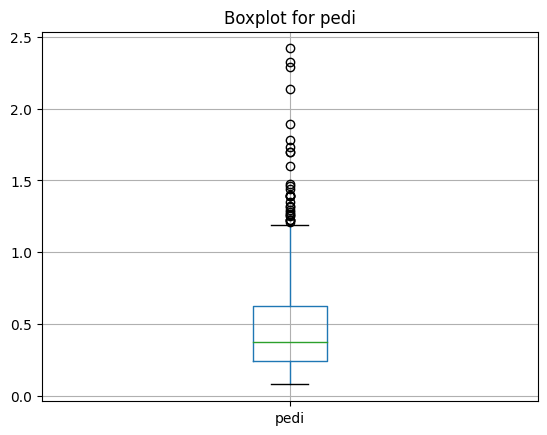

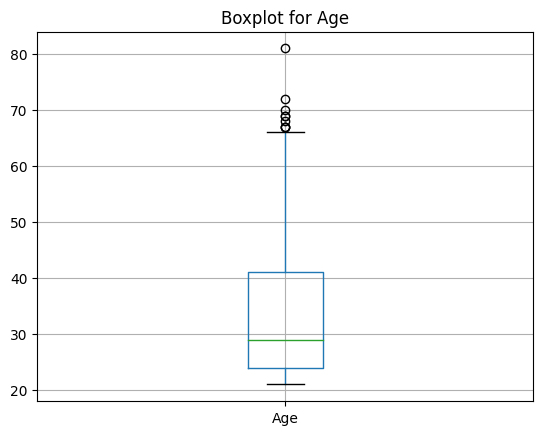

In [ ]:
# List of attributes excluding 'class'
attributes = ["pregs", "plas", "pres", "skin", "test", "BMI", "pedi", "Age"]

# Plot boxplot for each attribute
for attribute in attributes:
    df.boxplot(column=attribute)
    plt.title(f'Boxplot for {attribute}')
    plt.show()